This Notebook demonstrates how to use the functions in `../utils`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': 'Arial', 'font.size':11})

sys.path.append('../src')
import shtools
import constants
import icgem

home_dir = os.getcwd()
data_dir = os.path.join(home_dir, 'data')

# Download and read spherical harmonic coefficients (ICGEM format)

The function `read_shc` in `../utils/shtools` can be used to read certain attributes from a `.gfc` file downloaded from [ICGEM](https://icgem.gfz-potsdam.de/tom_longtime). 

In [3]:
model = 'GO_CONS_GCF_2_TIM_R6e'
# icgem.download_ggm(model_name=model)

fname = 'downloads/' + model + '.gfc'

shc = icgem.read_icgem(fname)
print(f'\nData type of shc: {type(shc)}')


Data type of shc: <class 'dict'>


`read_shc` returns a dict, which contains:

<pre>
- 'a'       : The reference radius.
- 'nmax'    : The maximum degree of expansion.
- 'GM'      : The Earth's gravitational constant.
- 'Cnm'     : A numpy array containing the cosine coefficients.
- 'Snm'     : A numpy array containing the sine coefficients.
- 'sCnm'    : A numpy array containing the formal cosine errors.
- 'sSnm'    : A numpy array containing the formal sine errors.
- 'tide_sys': The tide system used in the model.
</pre>

We can print out radius, nmax, GM, and tide system and compare with the values in `model` (open the .gfc file in a text editor to see these values). For reference, the values in the `.gfc` file are:

<pre>
- radius                 (a)          : 6378136.46
- max_degree             (nmax)       : 300
- earth_gravity_constant (GM)         : 3.986004415E+14
- tide_system            (tide_sys)   : zero_tide
</pre>


In [4]:
for key in ['a', 'nmax', 'GM', 'tide_sys']:
    print(f'{key:<10}: {shc[key]}')

a         : 6378136.46
nmax      : 300
GM        : 398600441500000.0
tide_sys  : zero_tide


# Degree Variances

Constants from the global geopotential model

In [5]:
# variances1 = shtools.degree_amplitude1(shc, ellipsoid='grs80')
variances  = shtools.degree_amplitude(shc, ellipsoid='grs80')
error_variances = shtools.error_degree_amplitude(shc, ellipsoid='grs80')

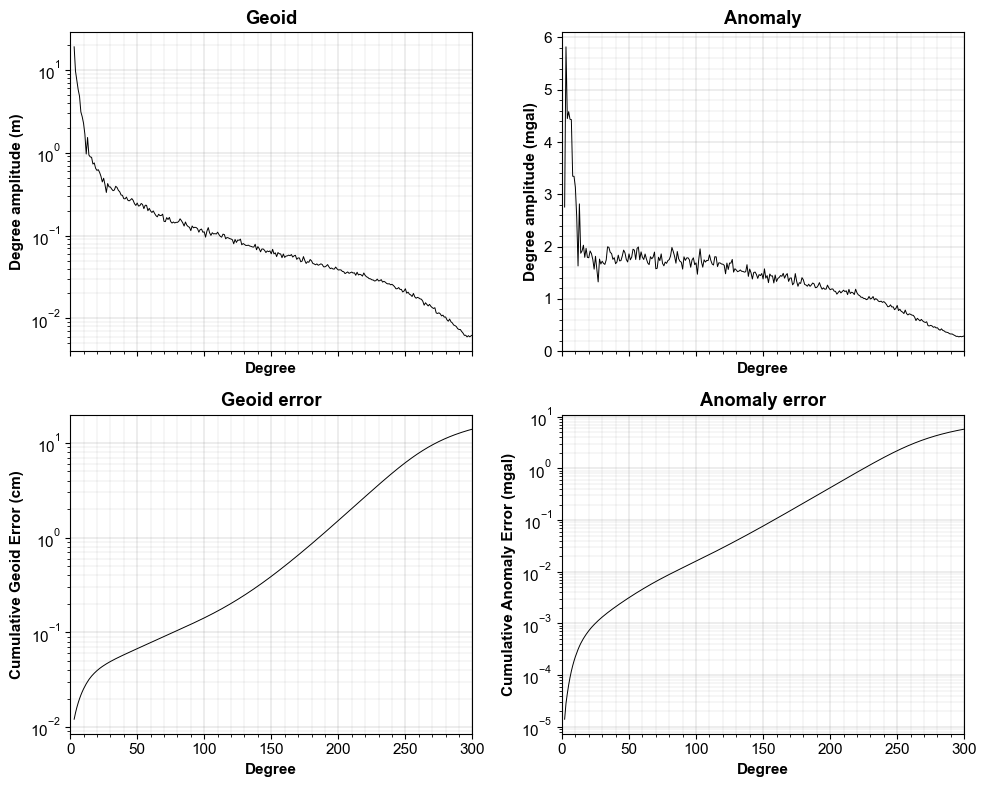

In [6]:
fig, axs = plt.subplots(2,2, figsize=(10,8), sharex=True)

axs = axs.ravel()

axs[0].plot(variances['degree'][3:], variances['geoid'][3:], linewidth=0.7, color='k')
axs[1].plot(variances['degree'][2:], variances['anomaly'][2:], linewidth=0.7, color='k')
axs[2].plot(error_variances['degree'][3:], error_variances['error_geoid'][3:], linewidth=0.7, color='k')
axs[3].plot(error_variances['degree'][2:], error_variances['error_anomaly'][2:], linewidth=0.7, color='k')

titles = ['Geoid', 'Anomaly', 'Geoid error', 'Anomaly error']
ylabels = ['Degree amplitude (m)', 'Degree amplitude (mgal)', 'Cumulative Geoid Error (cm)', 'Cumulative Anomaly Error (mgal)']

xlims  = [0, shc['nmax']]
ylims  = [[0, 20], [0, 6]]

for i, (ax, title) in enumerate(zip(axs, titles)):
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Degree', fontweight='bold')
    ax.set_ylabel(ylabels[i], fontweight='bold')
    ax.set_xlim(xlims)
    
    if i != 1:
        ax.set_yscale('log')
    
    ax.grid(which='both', linewidth=0.5, color='gray')
    ax.minorticks_on()
    ax.grid(which='minor', linewidth=0.1, color='gray')
    ax.grid(linewidth=0.2)


fig.tight_layout()
plt.show()

# Gravity Anomalies

In [7]:
import coordinates as co
from legendre import ALF

In [14]:
lon = np.linspace(-180, 180, 360)
lat = np.linspace(-90, 90, 180)
h   = 0
[lon, lat] = np.meshgrid(lon, lat)

r, vartheta, _ = co.geodetic2spherical(phi=lat, lambd=lon, height=h, ellipsoid='grs80')

In [25]:
Pnm = ALF(phi=np.degrees(vartheta[0,0]), nmax=60, ellipsoid='grs80') 

In [26]:
Pnm.shape

(61, 61)

# Reference Geoid

In [6]:
from ggm_geoid import reference_geoid

In [9]:
import coordinates as co

In [12]:
co.geodetic2geocentric(80)

79.93397880982552

In [18]:
import gravity

In [21]:
gravity.normal_gravity(0)

9.7803253359

In [24]:
import constants

In [26]:
constants.wgs84()

{'semi_major': 6378137,
 'semi_minor': 6356752.3142,
 'GM': 398600441800000.0,
 'w': 7.292115e-05,
 'E': 521854.00842339,
 'c': 6399593.6258,
 'e': 0.081819190842622,
 'e2': 0.00669437999014,
 'ep': 0.082094437949696,
 'ep2': 0.00673949674228,
 'f': 0.0033528106647474805,
 'U0': 62636851.7146,
 'm': 0.00344978650684,
 'gamma_a': 9.7803253359,
 'gamma_b': 9.8321849378,
 'mean_gamma': 9.7976432222,
 'C20': -0.000484166774985,
 'C40': 7.90303733511e-07,
 'C60': -1.68724961151e-09,
 'C80': 3.46052468394e-12,
 'C100': -2.65002225747e-15}

In [25]:
constants.grs80()

{'semi_major': 6378137,
 'semi_minor': 6356752.3141,
 'GM': 398600500000000.0,
 'J2': 0.00108263,
 'w': 7.292115e-05,
 'E': 521854.0097,
 'c': 6399593.6259,
 'e2': 0.0066943800229,
 'ep2': 0.00673949677548,
 'f': 0.003352810681,
 '1/f': 298.257222101,
 'U0': 62636860.85,
 'J4': -2.37091222e-06,
 'J6': 6.08347e-09,
 'J8': -1.427e-11,
 'm': 0.00344978600308,
 'gamma_a': 9.7803267715,
 'gamma_b': 9.8321863685,
 'C20': -0.000484166854903603,
 'C40': 7.90304072916597e-07,
 'C60': -1.68725117581045e-09,
 'C80': 3.46053239866698e-12,
 'C100': -2.65006218130312e-15}

In [27]:
X = 2
Y = 10
Z = 7

psi = np.arctan( Z / (X**2 + Y**2) )
vartheta = np.pi/2 - psi
print(f'Colatitude is: {vartheta}')

psi = np.arctan( (X**2 + Y**2) / Z )
print(f'Colatitude is: {psi}')

Colatitude is: 1.5035900010125318
Colatitude is: 1.5035900010125318


In [3]:
import numpy as np
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

b = np.array([1, 2, 3])
test_dict = {'a': a, 'b': b}

print(test_dict['a'])

test_dict['a'][0,0] = 100

test_dict['a']

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[100,   2,   3],
       [  4,   5,   6],
       [  7,   8,   9]])

In [ ]:
# Interpolate the free_air_anomaly and bouguer_anomaly onto the grid
grid_free_air_anomaly = scipy.interpolate.griddata(points, values_free_air, (grid_Lon, grid_Lat), method='cubic')
grid_bouguer_anomaly = scipy.interpolate.griddata(points, values_bouguer, (grid_Lon, grid_Lat), method='cubic')